# An End-to-End Classification Test
As the last step, you are given a dataset called `data/ccdefault.csv`. The dataset represents default of credit card clients. It has 30,000 cases and 24 different attributes. More details about the dataset is available at `data/ccdefault.txt`. In this task you should make three models, compare their results and conclude the ideal solution. Here are the suggested steps:
1. Load the data.
2. Carry out some exploratory analyses (e.g., how various features and the target variable are distributed).
3. Train a model to predict the target variable (risk of `default`).
  - Employ three different models (logistic regression, decision tree, and random forest).
  - Compare the models' performances (e.g., AUC).
  - Defend your choice of best model (e.g., what are the strength and weaknesses of each of these models?).
4. What more would you do with this data? Anything to help you devise a better solution?

In [7]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('lab2').getOrCreate()

## Explore data

In [8]:
df = spark.read.csv('data/ccdefault.csv', header=True, inferSchema=True)

### Schema

In [12]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- LIMIT_BAL: integer (nullable = true)
 |-- SEX: integer (nullable = true)
 |-- EDUCATION: integer (nullable = true)
 |-- MARRIAGE: integer (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- PAY_0: integer (nullable = true)
 |-- PAY_2: integer (nullable = true)
 |-- PAY_3: integer (nullable = true)
 |-- PAY_4: integer (nullable = true)
 |-- PAY_5: integer (nullable = true)
 |-- PAY_6: integer (nullable = true)
 |-- BILL_AMT1: integer (nullable = true)
 |-- BILL_AMT2: integer (nullable = true)
 |-- BILL_AMT3: integer (nullable = true)
 |-- BILL_AMT4: integer (nullable = true)
 |-- BILL_AMT5: integer (nullable = true)
 |-- BILL_AMT6: integer (nullable = true)
 |-- PAY_AMT1: integer (nullable = true)
 |-- PAY_AMT2: integer (nullable = true)
 |-- PAY_AMT3: integer (nullable = true)
 |-- PAY_AMT4: integer (nullable = true)
 |-- PAY_AMT5: integer (nullable = true)
 |-- PAY_AMT6: integer (nullable = true)
 |-- DEFAULT: integer (nullable = tru

### Size

In [13]:
df.count()

30000

### Look at data

In [14]:
### Look at data
df.show(5)

+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
| ID|LIMIT_BAL|SEX|EDUCATION|MARRIAGE|AGE|PAY_0|PAY_2|PAY_3|PAY_4|PAY_5|PAY_6|BILL_AMT1|BILL_AMT2|BILL_AMT3|BILL_AMT4|BILL_AMT5|BILL_AMT6|PAY_AMT1|PAY_AMT2|PAY_AMT3|PAY_AMT4|PAY_AMT5|PAY_AMT6|DEFAULT|
+---+---------+---+---------+--------+---+-----+-----+-----+-----+-----+-----+---------+---------+---------+---------+---------+---------+--------+--------+--------+--------+--------+--------+-------+
|  1|    20000|  2|        2|       1| 24|    2|    2|   -1|   -1|   -2|   -2|     3913|     3102|      689|        0|        0|        0|       0|     689|       0|       0|       0|       0|      1|
|  2|   120000|  2|        2|       2| 26|   -1|    2|    0|    0|    0|    2|     2682|     1725|     2682|     3272|     3455|     3261|       0|    1000|    1000|    1000|       0|    2000|    

For aggregating and visualizing

In [ ]:
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

#### Distribution of sex

In [22]:
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

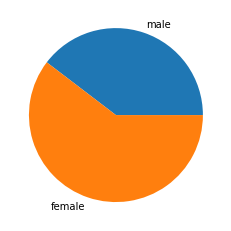

In [30]:
df_sex = df.groupBy("SEX").count().sort(asc("SEX")).toPandas()
labels = ["male", "female"]
plt.pie(df_sex['count'], labels=labels);

#### Distribution of education

In [38]:
df_education = df.groupBy("EDUCATION").count().sort(asc("EDUCATION")).toPandas()
df_education

,EDUCATION,count
0,0,14
1,1,10585
2,2,14030
3,3,4917
4,4,123
5,5,280
6,6,51


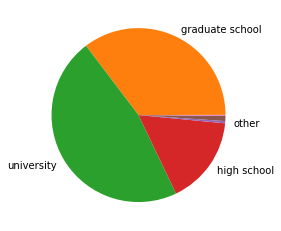

In [39]:
labels = ["", "graduate school", "university", "high school", "other", "", ""]
plt.pie(df_education['count'], labels=labels);

#### Distribution of marriage status

In [41]:
df_marriage = df.groupBy("MARRIAGE").count().sort(asc("MARRIAGE")).toPandas()
df_marriage

,MARRIAGE,count
0,0,54
1,1,13659
2,2,15964
3,3,323


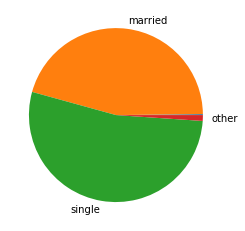

In [43]:
labels = ["", "married", "single", "other"]
plt.pie(df_marriage['count'], labels=labels);

#### Distribution of ages

In [46]:
df_age = df.groupBy("AGE").count().sort(asc("AGE")).toPandas()

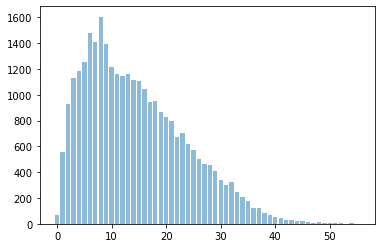

In [53]:
import numpy as np
y_pos = np.arange(df_age["AGE"].size)
plt.bar(y_pos, df_age["count"], align='center', alpha=0.5);